# BHARAT INTERN

# NAME : YANNAMANI  VENKATA SURYA PRAKASH

# TASK 1 : STOCK PREDICTION

# PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

# ABOUT DATASET

# Tsla Stock Prediction

This dataset contains historical data of tsla's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:



1.Symbol: The name of the company, which is tsla in this case.

2.Date: The year and date of the stock data.

3.Close: The closing price of tsla's stock on a particular day.

4.High: The highest value reached by tsla's stock on the given day.

5.Low: The lowest value reached by tsla's stock on the given day.

6.Open: The opening value of tsla's stock on the given day.

7.Volume: The trading volume of tsla's stock on the given day, i.e., the number of shares traded.

8.adjClose: The adjusted closing price of tsla's stock, considering factors such as dividends and stock splits.

9.adjHigh: The adjusted highest value reached by tsla's stock on the given day.

10.adjLow: The adjusted lowest value reached by tsla's stock on the given day.

11.adjOpen: The adjusted opening value of tsla's stock on the given day.

12.adjVolume: The adjusted trading volume of tsla's stock on the given day, accounting for factors such as stock splits.

13.divCash: The amount of cash dividend paid out to shareholders on the given day.

14.splitFactor: The split factor, if any, applied to tsla's stock on the given day. A split factor of 1 indicates no split.

# STEPS INVOLVED :


1 . IMPORTING LIBRARIES AND DATA TO BE USED

2. GATHERING INSIGHTS

3. DATA PRE-PROCESSING

4. CREATING LSTM MODEL

5. VISUALIZING ACTUAL VS PREDICTED DATA

6. PREDICTING UPCOMING 15 DAYS

In [14]:
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [15]:
df = pd.read_csv('TSLA.csv') 
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
95,2010-11-11,28.600000,29.100000,27.330000,28.040001,28.040001,1945300
96,2010-11-12,28.250000,30.500000,28.070000,29.840000,29.840000,2729100
97,2010-11-15,30.219999,32.939999,30.219999,30.799999,30.799999,2622900
98,2010-11-16,31.000000,31.400000,28.420000,29.670000,29.670000,1347600


In [16]:
print("Shape of data:",df.shape)

Shape of data: (2416, 7)


In [17]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [18]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [19]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [21]:
df = df[['Date','Open','Close']]

In [22]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())

In [23]:
df.set_index('Date', drop=True, inplace=True)

In [24]:
df.head(10)

,Open,Close
Date,,
2010-06-29,19.000000,23.889999
2010-06-30,25.790001,23.830000
2010-07-01,25.000000,21.959999
2010-07-02,23.000000,19.200001
2010-07-06,20.000000,16.110001
2010-07-07,16.400000,15.800000
2010-07-08,16.139999,17.459999
2010-07-09,17.580000,17.400000
2010-07-12,17.950001,17.049999


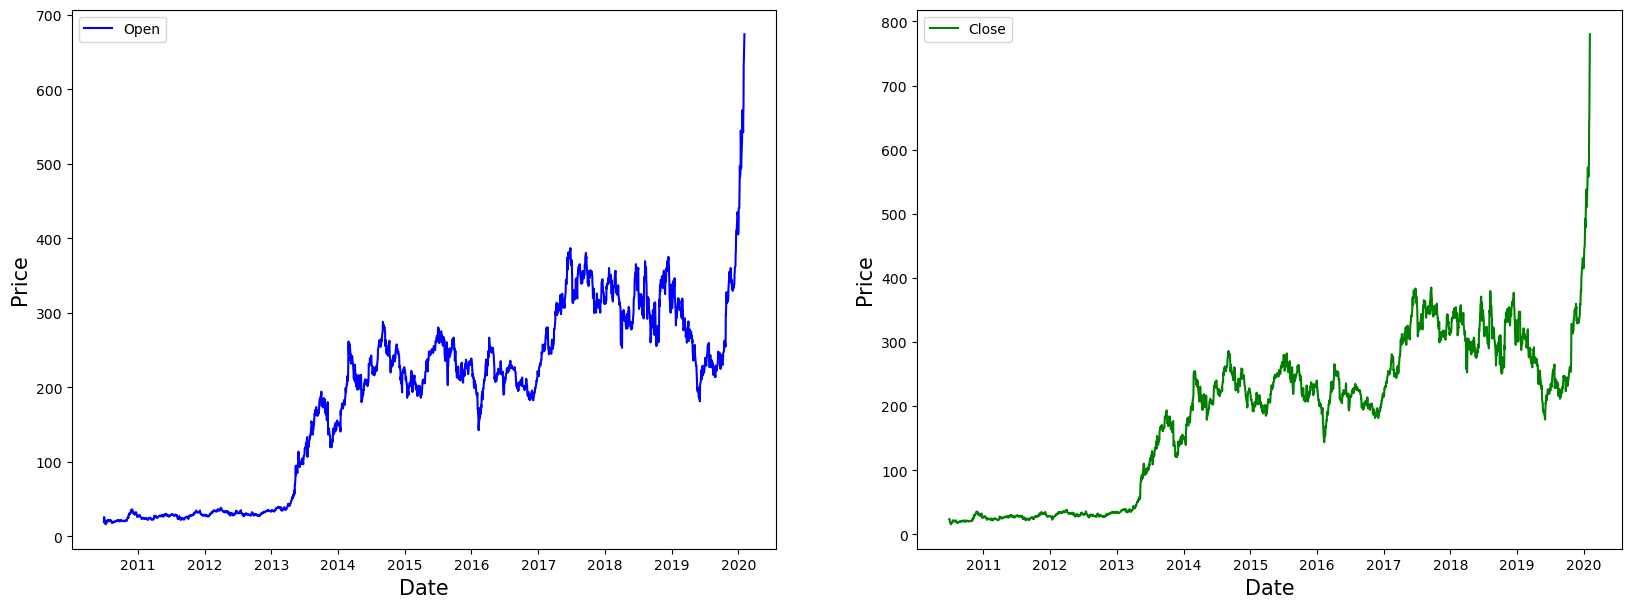

In [25]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [26]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2010-06-29,0.004349,0.010586
2010-06-30,0.014676,0.010508
2010-07-01,0.013474,0.008061
2010-07-02,0.010433,0.004449
2010-07-06,0.005870,0.000406
2010-07-07,0.000395,0.000000
2010-07-08,0.000000,0.002172
2010-07-09,0.002190,0.002094
2010-07-12,0.002753,0.001636


In [27]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

1812

In [28]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((1812, 2), (604, 2))

In [30]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [31]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1762, 50, 2), (1762, 2), (554, 50, 2), (554, 2))

In [32]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
56/56 [==============================] - 5s 40ms/step - loss: 0.0037 - mean_absolute_error: 0.0385 - val_loss: 0.0019 - val_mean_absolute_error: 0.0299
Epoch 2/100
56/56 [==============================] - 1s 26ms/step - loss: 3.3072e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0016 - val_mean_absolute_error: 0.0285
Epoch 3/100
56/56 [==============================] - 2s 28ms/step - loss: 3.0802e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0018 - val_mean_absolute_error: 0.0284
Epoch 4/100
56/56 [==============================] - 1s 22ms/step - loss: 3.2774e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0015 - val_mean_absolute_error: 0.0266
Epoch 5/100
56/56 [==============================] - 1s 25ms/step - loss: 2.9093e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0022 - val_mean_absolute_error: 0.0328
Epoch 6/100
56/56 [==============================] - 1s 22ms/step - loss: 2.8544e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0012 - val_mean_absolute_error: 0.0

In [35]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

18/18 [==============================] - 1s 6ms/step


array([[0.44893265, 0.38660648],
       [0.45570952, 0.39231613],
       [0.43946248, 0.3780607 ],
       [0.45520425, 0.39199218],
       [0.44858557, 0.3859056 ]], dtype=float32)

In [36]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[311.33566, 311.24466],
       [315.7918 , 315.60797],
       [305.10855, 304.714  ],
       [315.45956, 315.3604 ],
       [311.10745, 310.70905]], dtype=float32)

In [43]:
# Select the last 264 rows of test_inverse_predicted
test_inverse_predicted_subset = test_inverse_predicted[-264:]

# Create a DataFrame with the selected data and columns
df_predicted = pd.DataFrame(test_inverse_predicted_subset, columns=['open_predicted', 'close_predicted'], index=df.iloc[-264:].index)

# Concatenate the DataFrames
df_merge = pd.concat([df.iloc[-264:].copy(), df_predicted], axis=1)

In [44]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2019-01-16,344.779999,346.049988,342.025421,341.681885
2019-01-17,346.209991,347.309998,344.647736,343.986298
2019-01-18,323.000000,302.260010,344.553497,343.756744
2019-01-22,304.820007,298.920013,294.595337,293.582581
2019-01-23,292.500000,287.589996,300.143585,300.544220


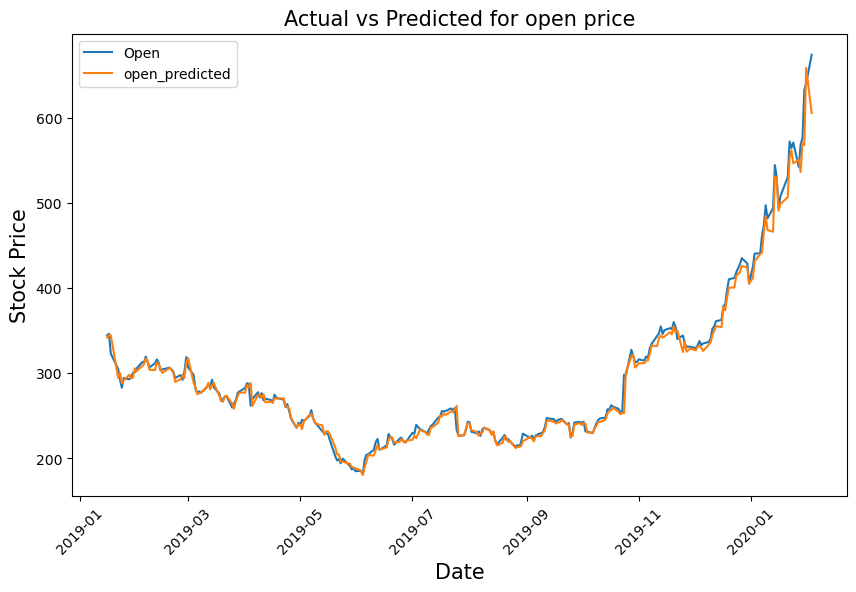

In [39]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

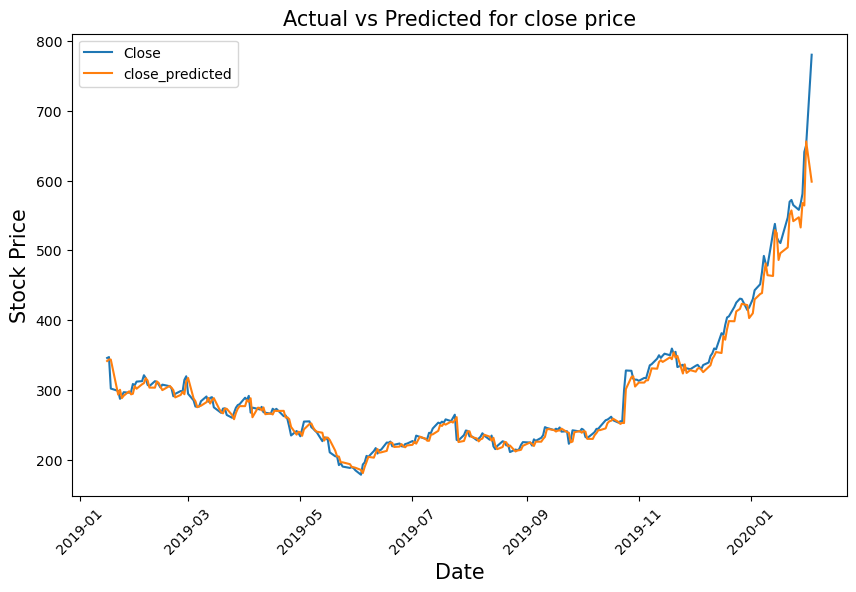

In [40]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [49]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))


In [52]:
from datetime import date

# Convert the string dates to datetime.date objects
start_date = date(2019, 6, 9)
end_date = date(2020, 6, 1)

# Slice the DataFrame using the datetime.date objects
df_merge[start_date:end_date]

,Open,Close,open_predicted,close_predicted
2019-06-10,210.250000,212.880005,203.253418,203.379913
2019-06-11,219.139999,217.100006,209.982346,210.161469
2019-06-12,222.949997,209.259995,215.551147,215.670303
2019-06-13,210.380005,213.910004,210.501236,210.516373
2019-06-14,211.250000,214.919998,210.954437,211.025467
...,...,...,...,...
2020-02-19 00:00:00,NaN,NaN,NaN,NaN
2020-02-20 00:00:00,NaN,NaN,NaN,NaN
2020-02-21 00:00:00,NaN,NaN,NaN,NaN
2020-02-22 00:00:00,NaN,NaN,NaN,NaN


In [53]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [54]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 9ms/step


In [55]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

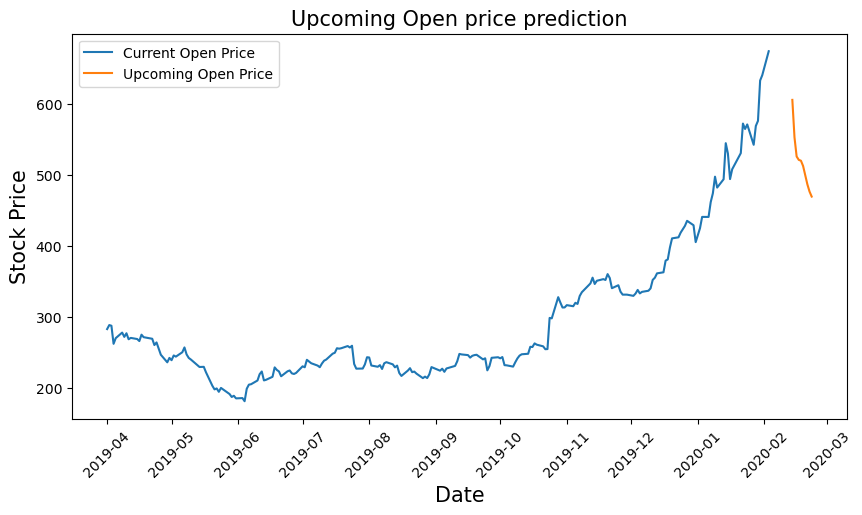

In [57]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
open_date = date(2019, 4, 1)
ax.plot(df_merge.loc[open_date:,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc[open_date:,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

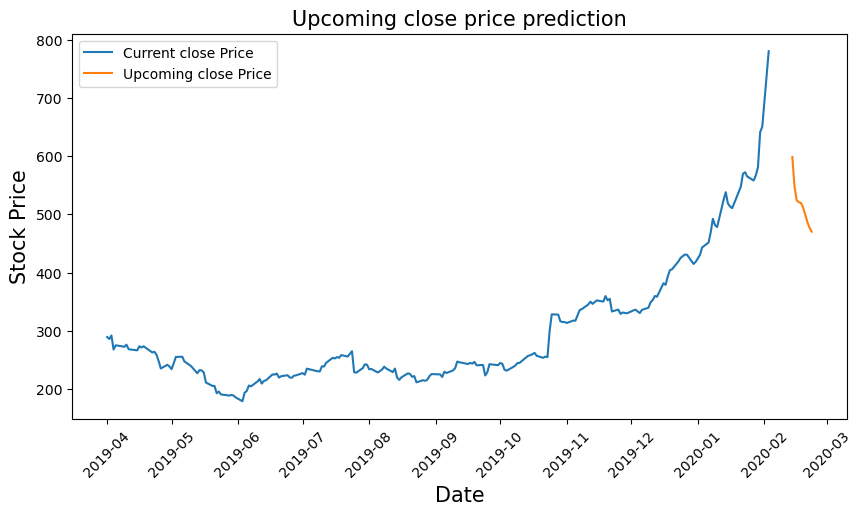

In [59]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
close_date = date(2019,4,1)
ax.plot(df_merge.loc[close_date:,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc[close_date:,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU :)